#Input Emission Estimation Data

In [ ]:
#!pip install miceforest

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import re
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv')
df_copy = df.copy()
df.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180


In [ ]:
df.shape

(54937, 11)

In [ ]:
#Drop the column that doesn't affect the y variable
df1 = df.drop(columns=['Id', 'CO2 Emissions(g/km)'])
df1.head(2)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km
1,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km


#Data Value Handling

In [ ]:
print('Make =', df1['Make'].unique())

Make = ['MITSU' 'TOYOTI' 'MATSUDA' 'CHEVO' 'DOGE' 'BMV' 'LECUS' 'KIO' 'FOLD'
 'JIPU' 'NIRRAN' 'CADILUXE' 'FOLKSWA' 'BARUSU' 'GONDA' 'LAND CRAWLER'
 'RYUNDAI' 'TOLVO' 'FIAR' 'ASURA' 'LAMBOGI']


In [ ]:
print('Vehicle Class =', df1['Vehicle Class'].unique())

Vehicle Class = ['SUV - SMALL' 'PICKUP TRUCK - SMALL' 'COMPACT' 'VAN - PASSENGER'
 'MID-SIZE' 'SUV - STANDARD' 'STATION WAGON - SMALL' 'FULL-SIZE'
 'TWO-SEATER' 'PICKUP TRUCK - STANDARD' 'SUBCOMPACT' nan
 'STATION WAGON - MID-SIZE' 'MINICOMPACT' 'MINIVAN' 'not-available'
 'not-recorded' 'SPECIAL PURPOSE VEHICLE' 'missing' 'unestablished' 'na'
 'unknown' 'unspecified' 'VAN - CARGO']


In [ ]:
print('Engine Size(L) =', df1['Engine Size(L)'].unique())
eng_string = df1.loc[df['Engine Size(L)'].apply(lambda x: isinstance(x, str) and not any(char.isdigit() for char in x))]
eng_string = pd.DataFrame(eng_string)
print("Nilai yang hanya mengandung string:")
eng_string['Engine Size(L)'].unique()

Engine Size(L) = ['1.5' 'not-available' '2.0' 'unknown' '1.8' '2.4' '3.5' '2.7' '1.6' 'na'
 '1.2' '2.5' '3.2' '5.0' '8.4' '1.4' '3.8' 'unestablished' '6.2' nan '4.4'
 '3.0' '3.6' '5.7' '5.2' '6.4' '2.3' 'not-recorded' '3.3' '5.3' 'missing'
 '6.5' '1.0' '4.0' '3.7' '1.3' 'unspecified' '4.6' '4.8' '5.6' '2.8' '6.0'
 '4.2' '4.3' '2.2' '6.6' '5.4' '3.4' '5.8' '6.8']
Nilai yang hanya mengandung string:


array(['not-available', 'unknown', 'na', 'unestablished', 'not-recorded',
       'missing', 'unspecified'], dtype=object)

In [ ]:
print('Cylinders =', df1['Cylinders'].unique())

Cylinders = ['4.0' '6.0' '8.0' 'unknown' 'na' '3.0' '10.0' 'not-recorded'
 'unspecified' '12.0' nan '5.0' 'missing' 'not-available' 'unestablished']


In [ ]:
#Bisa dipisah antara kode huruf dengan angka
#Angka = jumlah roda
#Huruf = tipe (matic/mamual/dll)
print('Transmission =', df1['Transmission'].unique())

Transmission = ['AV8' 'A5' 'AS6' 'A6' 'M6' 'M5' 'A9' 'AS8' 'AV' 'AM6' 'AS10' 'A8' 'AS9'
 'unestablished' 'AM8' 'AM7' 'AV7' 'A4' 'not-recorded' 'AV6' 'missing'
 'unspecified' 'AV10' 'AS5' 'M7' 'A10' 'na' 'AS7' 'not-available'
 'unknown' nan 'A7' 'AM9']


In [ ]:
print('Fuel Type =', df1['Fuel Type'].unique())

Fuel Type = ['X' 'Z' nan 'E' 'missing' 'not-recorded' 'not-available' 'D'
 'unspecified' 'unknown' 'na' 'unestablished' 'N']


In [ ]:
print('Fuel Consumption City =', df1['Fuel Consumption City'].unique())
fuelcity_string = df1.loc[df1['Fuel Consumption City'].apply(lambda x: isinstance(x, str) and not any(char.isdigit() for char in x))]
fuelcity_string = pd.DataFrame(fuelcity_string)
print("Nilai yang hanya mengandung string:")
fuelcity_string['Fuel Consumption City'].unique()

Fuel Consumption City = ['8.40 km/L' '7.25 km per L' '9.80 km/L' ... '25.40 liters per 100 km'
 '24.60 L/100 km' '28.80 liters per 100 km']
Nilai yang hanya mengandung string:


array(['not-available', 'zero'], dtype=object)

In [ ]:
print('Fuel Consumption Hwy =', df1['Fuel Consumption Hwy'].unique())
fuelhwy_string = df1.loc[df1['Fuel Consumption Hwy'].apply(lambda x: isinstance(x, str) and not any(char.isdigit() for char in x))]
fuelhwy_string = pd.DataFrame(fuelhwy_string)
print("Nilai yang hanya mengandung string:")
fuelhwy_string['Fuel Consumption Hwy'].unique()

Fuel Consumption Hwy = ['0.72 L/10km' '9.70 L/100km' '38.70 mpg Imp.' ... '19.30 L/100km'
 '14.52 MPG (AS)' '15.35 mpg Imp.']
Nilai yang hanya mengandung string:


array(['zero', 'not-available'], dtype=object)

In [ ]:
#This column showcases the combined fuel consumption rating,
#calculated as a blend of 55% city driving and 45% highway driving.
print('Fuel Consumption Comb =', df1['Fuel Consumption Comb'].unique())
fuelcomb_string = df1.loc[df1['Fuel Consumption Comb'].apply(lambda x: isinstance(x, str) and not any(char.isdigit() for char in x))]
fuelcomb_string = pd.DataFrame(fuelcomb_string)
print("Nilai yang hanya mengandung string:")
fuelcomb_string['Fuel Consumption Comb'].unique()

Fuel Consumption Comb = ['0.98 L/10km' '11.96 L/100km' '31.76 mpg Imp.' ...
 '18.73 liters per 100 km' '16.85 km per L' '15.07 L/100km']
Nilai yang hanya mengandung string:


array(['not-available', 'zero'], dtype=object)

###Replacing the unspecified values by NaN

In [ ]:
# Mengganti beberapa nilai hilang Vehicle Class dengan np.nan
df_vc = df1['Vehicle Class'].replace({
    'not-available': np.nan,
    'not-recorded': np.nan,
    'unestablished': np.nan,
    'na': np.nan,
    'unknown': np.nan,
    'unspecified': np.nan,
    'missing': np.nan
})
print('Jumlah Null =', df_vc.isna().sum())
print('Unique =', df_vc.unique())

Jumlah Null = 2051
Unique = ['SUV - SMALL' 'PICKUP TRUCK - SMALL' 'COMPACT' 'VAN - PASSENGER'
 'MID-SIZE' 'SUV - STANDARD' 'STATION WAGON - SMALL' 'FULL-SIZE'
 'TWO-SEATER' 'PICKUP TRUCK - STANDARD' 'SUBCOMPACT' nan
 'STATION WAGON - MID-SIZE' 'MINICOMPACT' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'VAN - CARGO']


In [ ]:
# Mengganti beberapa nilai hilang Engine Size(L) dengan np.nan
df_eng = df1['Engine Size(L)'].replace({
    'not-available': np.nan,
    'not-recorded': np.nan,
    'unestablished': np.nan,
    'na': np.nan,
    'unknown': np.nan,
    'unspecified': np.nan,
    'missing': np.nan
})
df_eng = df_eng.astype(np.float32)
print('Jumlah Null =', df_eng.isna().sum())
print('Unique =', df_eng.unique())

Jumlah Null = 5264
Unique = [1.5 nan 2.  1.8 2.4 3.5 2.7 1.6 1.2 2.5 3.2 5.  8.4 1.4 3.8 6.2 4.4 3.
 3.6 5.7 5.2 6.4 2.3 3.3 5.3 6.5 1.  4.  3.7 1.3 4.6 4.8 5.6 2.8 6.  4.2
 4.3 2.2 6.6 5.4 3.4 5.8 6.8]


In [ ]:
# Mengganti beberapa nilai hilang Cylinders dengan np.nan
df_cyl = df1['Cylinders'].replace({
    'not-available': np.nan,
    'not-recorded': np.nan,
    'unestablished': np.nan,
    'na': np.nan,
    'unknown': np.nan,
    'unspecified': np.nan,
    'missing': np.nan
})
df_cyl = df_cyl.astype(np.float32)
print('Jumlah Null =', df_cyl.isna().sum())
print('Unique =', df_cyl.unique())

Jumlah Null = 4523
Unique = [ 4.  6.  8. nan  3. 10. 12.  5.]


In [ ]:
# Mengganti beberapa nilai hilang Transmission dengan np.nan
df_trans = df1['Transmission'].replace({
    'not-available': np.nan,
    'not-recorded': np.nan,
    'unestablished': np.nan,
    'na': np.nan,
    'unknown': np.nan,
    'unspecified': np.nan,
    'missing': np.nan
})
print('Jumlah Null =', df_trans.isna().sum())
print('Unique =', df_trans.unique())

Jumlah Null = 1483
Unique = ['AV8' 'A5' 'AS6' 'A6' 'M6' 'M5' 'A9' 'AS8' 'AV' 'AM6' 'AS10' 'A8' 'AS9'
 nan 'AM8' 'AM7' 'AV7' 'A4' 'AV6' 'AV10' 'AS5' 'M7' 'A10' 'AS7' 'A7' 'AM9']


In [ ]:
# Mengganti beberapa nilai hilang Fuel Type dengan np.nan
df_ft = df1['Fuel Type'].replace({
    'not-available': np.nan,
    'not-recorded': np.nan,
    'unestablished': np.nan,
    'na': np.nan,
    'unknown': np.nan,
    'unspecified': np.nan,
    'missing': np.nan
})
print('Jumlah Null =', df_ft.isna().sum())
print('Unique =', df_ft.unique())

Jumlah Null = 1942
Unique = ['X' 'Z' nan 'E' 'D' 'N']


###Replacing zero values by 0 and the unspecified values by NaN on Fuels Features

In [ ]:
#Fuel Consumption City
df_fuelcity = df1['Fuel Consumption City'].replace({
    'not-available': np.nan,
    'zero' : 0
})
df_fuelcity

0             8.40 km/L
1         7.25 km per L
2             9.80 km/L
3           1.73 L/10km
4          8.10 L/100km
              ...      
54932     11.90 L/100km
54933       2.10 L/10km
54934     18.20 L/100km
54935    18.30 L/100 km
54936     9.70 L/100 km
Name: Fuel Consumption City, Length: 54937, dtype: object

In [ ]:
#Fuel Consumption Hwy
df_fuelhwy = df1['Fuel Consumption Hwy'].replace({
    'not-available': np.nan,
    'zero' : 0
})
df_fuelhwy

0                    0.72 L/10km
1                   9.70 L/100km
2                 38.70 mpg Imp.
3        11.70 liters per 100 km
4                 35.76 mpg Imp.
                  ...           
54932             11.36 km per L
54933                1.06 L/10km
54934              12.50 L/100km
54935     9.90 liters per 100 km
54936             32.22 MPG (AS)
Name: Fuel Consumption Hwy, Length: 54937, dtype: object

###Select the float values only and replace with Regex

In [ ]:
#Fuel Consumption Comb
df_fuelcomb = df1['Fuel Consumption Comb'].replace({
    'not-available': np.nan,
    'zero' : 0
})
df_fuelcomb

0                    0.98 L/10km
1                  11.96 L/100km
2                 31.76 mpg Imp.
3        14.78 liters per 100 km
4         8.01 liters per 100 km
                  ...           
54932             22.39 MPG (AS)
54933             14.41 MPG (AS)
54934             15.63 L/100 km
54935             14.52 L/100 km
54936                        NaN
Name: Fuel Consumption Comb, Length: 54937, dtype: object

In [ ]:
df_re_fuelcity = df_fuelcity.replace('[^0-9.]+', '0', regex = True).replace('\.*$', '', regex=True).astype(float)
df_re_fuelcity = df_re_fuelcity.round(2)
df_re_fuelcity

0         8.40
1         7.25
2         9.80
3         1.73
4         8.10
         ...  
54932    11.90
54933     2.10
54934    18.20
54935    18.30
54936     9.70
Name: Fuel Consumption City, Length: 54937, dtype: float64

In [ ]:
df_re_fuelhwy = df_fuelhwy.replace('[^0-9.]+', '0', regex = True).replace('\.*$', '', regex=True).astype(float)
df_re_fuelhwy = df_re_fuelhwy.round(2)
df_re_fuelhwy

0         0.72
1         9.70
2        38.70
3        11.70
4        35.76
         ...  
54932    11.36
54933     1.06
54934    12.50
54935     9.90
54936    32.22
Name: Fuel Consumption Hwy, Length: 54937, dtype: float64

In [ ]:
df_re_fuelcomb = df_fuelcomb.replace('[^0-9.]+', '0', regex = True).replace('\.*$', '', regex=True).astype(float)
df_re_fuelcomb = df_re_fuelcomb.round(2)
df_re_fuelcomb

0         0.98
1        11.96
2        31.76
3        14.78
4         8.01
         ...  
54932    22.39
54933    14.41
54934    15.63
54935    14.52
54936      NaN
Name: Fuel Consumption Comb, Length: 54937, dtype: float64

#Feature Engineering

###Memisahkan kode huruf dan angka pada Transmission

In [ ]:
#Gears
df_gears = df_trans.copy()
df_gears = df_gears.apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else np.nan)
df_gears = pd.DataFrame({'Gears': df_gears})
df_gears = df_gears.astype(np.float32)
df_gears

,Gears
0,8.0
1,5.0
2,6.0
3,6.0
4,6.0
...,...
54932,10.0
54933,6.0
54934,7.0
54935,8.0


In [ ]:
#Transmission
df_vehicle_type = df_trans.copy()
df_vehicle_type = df_vehicle_type.apply(lambda x: re.findall("[A-Za-z]+", str(x))[0] if re.findall("[A-Za-z]+", str(x)) else np.nan)
df_vehicle_type = pd.DataFrame({'Vehicle Type': df_vehicle_type})
df_vehicle_type

,Vehicle Type
0,AV
1,A
2,AS
3,A
4,M
...,...
54932,AS
54933,M
54934,AM
54935,A


In [ ]:
df_handled = pd.concat([df1['Make'],
                        df_vc,
                        df_eng,
                        df_cyl,
                        df_trans,
                        df_ft,
                        df_vehicle_type,
                        df_gears,
                        df_re_fuelcity,
                        df_re_fuelhwy,
                        df_re_fuelcomb], axis=1)
df_handled.head(2)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Vehicle Type,Gears,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,MITSU,SUV - SMALL,1.5,4.0,AV8,X,AV,8.0,8.40,0.72,0.98
1,TOYOTI,PICKUP TRUCK - SMALL,NaN,6.0,A5,X,A,5.0,7.25,9.70,11.96


In [ ]:
df_handled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   54937 non-null  object 
 1   Vehicle Class          52886 non-null  object 
 2   Engine Size(L)         49673 non-null  float32
 3   Cylinders              50414 non-null  float32
 4   Transmission           53454 non-null  object 
 5   Fuel Type              52995 non-null  object 
 6   Vehicle Type           54937 non-null  object 
 7   Gears                  50291 non-null  float32
 8   Fuel Consumption City  52967 non-null  float64
 9   Fuel Consumption Hwy   52813 non-null  float64
 10  Fuel Consumption Comb  52829 non-null  float64
dtypes: float32(3), float64(3), object(5)
memory usage: 4.0+ MB


#Data Visualization

In [ ]:
#Let visualize the handled features using histogram

def displot(x):
    sns.set(style="whitegrid", font_scale=.8)
    plot = sns.displot(df_handled[x], kde=True, color='skyblue')
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {x}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
#displot('Make')

In [ ]:
#displot('Vehicle Class')

In [ ]:
#displot('Engine Size(L)')

In [ ]:
#displot('Cylinders')

In [ ]:
#displot('Transmission')

In [ ]:
#displot('Fuel Type')

In [ ]:
#displot('Vehicle Type')

In [ ]:
#displot('Gears')

In [ ]:
#displot('Fuel Consumption City')

In [ ]:
#displot('Fuel Consumption Hwy')

In [ ]:
#displot('Fuel Consumption Comb')

#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

# Melakukan encoding
df_handled['Make'] = lE.fit_transform(df_handled['Make'])
df_handled['Vehicle Class'] = lE.fit_transform(df_handled['Vehicle Class'])
df_handled['Transmission'] = lE.fit_transform(df_handled['Transmission'])
df_handled['Fuel Type'] = lE.fit_transform(df_handled['Fuel Type'])
df_handled['Vehicle Type'] = lE.fit_transform(df_handled['Vehicle Type'])

# Menampilkan hasil
df_encoded = pd.concat([df_handled['Make'], df_handled['Vehicle Class'], df_handled['Transmission'], df_handled['Fuel Type'], df_handled['Vehicle Type']], axis=1)
df_encoded.head(3)

,Make,Vehicle Class,Transmission,Fuel Type,Vehicle Type
0,16,11,21,3,3
1,20,5,2,3,0
2,15,0,13,3,2


#Detect the outliers

In [ ]:
Q1 = df_handled['Fuel Consumption Hwy'].quantile(0.25)
Q3 = df_handled['Fuel Consumption Hwy'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_handled['Fuel Consumption Hwy'] < (Q1 - 3 * IQR)) | (df_handled['Fuel Consumption Hwy'] > (Q3 + 3 * IQR)))
outliers.sum()

289

###Assume there are not contains outliers
#####So we go to the next step

#Missing value imputation using MICE

In [ ]:
df_handled.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Vehicle Type,Gears,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,16,11,1.5,4.0,21,3,3,8.0,8.40,0.72,0.98
1,20,5,NaN,6.0,2,3,0,5.0,7.25,9.70,11.96
2,15,0,2.0,4.0,13,3,2,6.0,9.80,38.70,31.76
3,4,15,NaN,8.0,3,3,0,6.0,1.73,11.70,14.78
4,20,0,1.8,4.0,23,3,4,6.0,8.10,35.76,8.01


In [ ]:
#Combine the encoded data and the other handled data
columns_to_drop = set(df_encoded.columns).intersection(set(df_handled.columns))

df_handled_dropped = df_handled.drop(columns=columns_to_drop)

df_to_mice = pd.concat([df_encoded, df_handled_dropped], axis=1, ignore_index=False)
df_to_mice

,Make,Vehicle Class,Transmission,Fuel Type,Vehicle Type,Engine Size(L),Cylinders,Gears,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,16,11,21,3,3,1.5,4.0,8.0,8.40,0.72,0.98
1,20,5,2,3,0,NaN,6.0,5.0,7.25,9.70,11.96
2,15,0,13,3,2,2.0,4.0,6.0,9.80,38.70,31.76
3,4,15,3,3,0,NaN,8.0,6.0,1.73,11.70,14.78
4,20,0,23,3,4,1.8,4.0,6.0,8.10,35.76,8.01
...,...,...,...,...,...,...,...,...,...,...,...
54932,4,10,11,4,2,6.2,8.0,10.0,11.90,11.36,22.39
54933,4,10,23,3,4,3.6,6.0,6.0,2.10,1.06,14.41
54934,7,13,8,4,1,3.5,6.0,7.0,18.20,12.50,15.63
54935,4,6,5,4,0,6.2,8.0,8.0,18.30,9.90,14.52


In [ ]:
df_to_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   54937 non-null  int64  
 1   Vehicle Class          54937 non-null  int64  
 2   Transmission           54937 non-null  int64  
 3   Fuel Type              54937 non-null  int64  
 4   Vehicle Type           54937 non-null  int64  
 5   Engine Size(L)         49673 non-null  float32
 6   Cylinders              50414 non-null  float32
 7   Gears                  50291 non-null  float32
 8   Fuel Consumption City  52967 non-null  float64
 9   Fuel Consumption Hwy   52813 non-null  float64
 10  Fuel Consumption Comb  52829 non-null  float64
dtypes: float32(3), float64(3), int64(5)
memory usage: 4.0 MB


In [ ]:
#MICE
import miceforest as mf
from miceforest import (
  mean_match_default,
  mean_match_shap
)

kernel = mf.ImputationKernel(
  df_to_mice,
  datasets=1,
  mean_match_scheme = mean_match_shap,
  save_all_iterations=True,
  random_state=2004
)

#Run the MICE algorithm for 5 iterations on each of the datasets
kernel.mice(3)

In [ ]:
df_miced = kernel.complete_data()
df_miced.isna().sum()

Make                     0
Vehicle Class            0
Transmission             0
Fuel Type                0
Vehicle Type             0
Engine Size(L)           0
Cylinders                0
Gears                    0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
dtype: int64

In [ ]:
df_miced.describe()

,Make,Vehicle Class,Transmission,Fuel Type,Vehicle Type,Engine Size(L),Cylinders,Gears,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
count,54937.000000,54937.000000,54937.000000,54937.000000,54937.000000,54937.000000,54937.000000,54937.000000,54937.000000,54937.000000,54937.000000
mean,9.149371,6.552105,13.781987,3.191419,2.096055,2.977680,5.292772,6.883102,12.659911,13.779996,12.909546
std,5.972033,5.073824,6.649727,0.871338,1.387026,1.302592,1.599971,1.406970,8.494466,10.591866,8.832213
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,9.000000,3.000000,1.000000,2.000000,4.000000,6.000000,7.870000,7.600000,8.050000
50%,7.000000,6.000000,13.000000,3.000000,2.000000,2.500000,4.000000,6.000000,11.000000,10.420000,10.680000
75%,14.000000,11.000000,19.000000,4.000000,3.000000,3.600000,6.000000,8.000000,16.900000,16.950000,16.560000
max,20.000000,16.000000,25.000000,5.000000,5.000000,8.400000,12.000000,10.000000,67.260000,57.650000,61.950000


In [ ]:
df_miced_y = pd.concat([df_miced, df['CO2 Emissions(g/km)']], axis = 1)
df_miced_y.head(3)

,Make,Vehicle Class,Transmission,Fuel Type,Vehicle Type,Engine Size(L),Cylinders,Gears,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,16,11,21,3,3,1.5,4.0,8.0,8.40,0.72,0.98,208
1,20,5,2,3,0,4.0,6.0,5.0,7.25,9.70,11.96,325
2,15,0,13,3,2,2.0,4.0,6.0,9.80,38.70,31.76,170


####The next step is normalize the data by scaling using RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_miced), columns=df_miced.columns)
df_scaled

####Let combine the scaled features and y variable into one dataframe

In [ ]:
df_complete = pd.concat([df_scaled, df['CO2 Emissions(g/km)']], axis = 1)
df_complete

,Make,Vehicle Class,Transmission,Fuel Type,Vehicle Type,Engine Size(L),Cylinders,Gears,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,0.9,0.555556,0.8,0.0,0.5,-0.6250,0.0,1.0,-0.287929,-1.037433,-1.139835,208
1,1.3,-0.111111,-1.1,0.0,-1.0,0.9375,1.0,-0.5,-0.415282,-0.077005,0.150411,325
2,0.8,-0.666667,0.0,0.0,0.0,-0.3125,0.0,0.0,-0.132890,3.024599,2.477086,170
3,-0.3,1.000000,-1.0,0.0,-1.0,2.1875,2.0,0.0,-1.026578,0.136898,0.481786,362
4,1.3,-0.666667,1.0,0.0,1.0,-0.4375,0.0,0.0,-0.321152,2.710160,-0.313749,180
...,...,...,...,...,...,...,...,...,...,...,...,...
54932,-0.3,0.444444,-0.2,1.0,0.0,2.3125,2.0,2.0,0.099668,0.100535,1.376028,318
54933,-0.3,0.444444,1.0,0.0,1.0,0.6875,1.0,0.0,-0.985604,-1.001070,0.438308,303
54934,0.0,0.777778,-0.5,1.0,-0.5,0.6250,1.0,0.5,0.797342,0.222460,0.581669,410
54935,-0.3,0.000000,-0.8,1.0,-1.0,2.3125,2.0,1.0,0.808416,-0.055615,0.451234,466


###Analyze the correlation for feature selection

<Axes: >

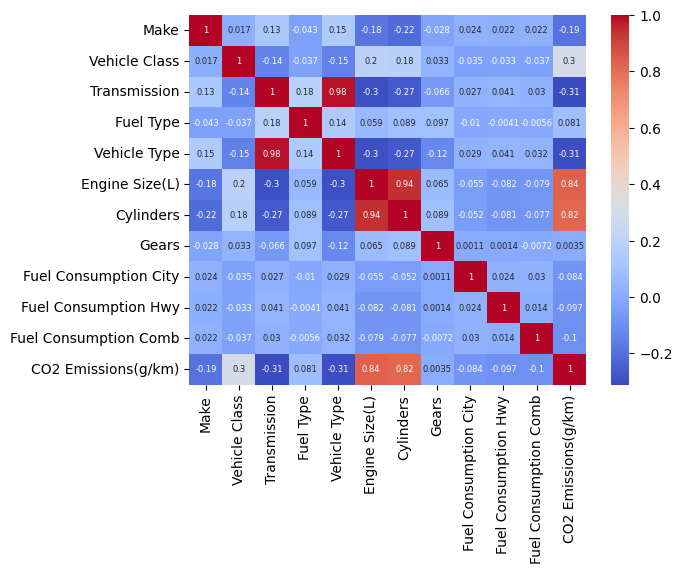

In [ ]:
#Correlation using heatmap

corr = df_complete.corr()

sns.heatmap(corr, cmap = 'coolwarm', annot=True, annot_kws={"size": 6})

#Train Test Split
####Splitting the data to data train and data test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['CO2 Emissions(g/km)'], test_size=0.2, random_state=2004)

In [ ]:
X_train.shape

(43949, 11)

In [ ]:
y_test.shape

(10988,)

In [ ]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV

# Tentukan grid parameter yang akan dijelajahi
param_grid = {
    'learning_rate': [0.2, 0.3],
    'max_depth': [7, 10],
    'n_estimators': [200, 500, 700]
}

xgb_reg = xgb.XGBRegressor()

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3)

# Lakukan penalaan hyperparameter
grid_search.fit(X_train, y_train)

#Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


In [ ]:
# Inisialisasi model XGBoost
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          learning_rate = 0.2,
                           max_depth = 7,
                           n_estimators = 200)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_reg.predict(X_test)
y_pred

array([270.40375, 276.03632, 362.54767, ..., 153.2937 , 165.80856,
       221.97534], dtype=float32)

In [ ]:
mean_squared_error(y_pred, y_test)**0.5

20.34076421080036